In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [ ]:
!pip install torchtext==0.3.1

     |████████████████████████████████| 62 kB 927 kB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.11.0
    Uninstalling torchtext-0.11.0:
      Successfully uninstalled torchtext-0.11.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!pip install transformers==3.2.0

     |████████████████████████████████| 1.0 MB 8.2 MB/s 
     |████████████████████████████████| 3.0 MB 56.0 MB/s 
     |████████████████████████████████| 1.2 MB 58.4 MB/s 
     |████████████████████████████████| 895 kB 67.0 MB/s 


In [ ]:
import pandas as pd

final_data = pd.read_csv("train_skill_name_difficulty.csv")
final_data

,board_syllabus,question_answer,skill_label,difficulty_label
0,"Raj English>>XII>>Biology>>Domestication, Cult...","Among the following, freshwater fish is rohu ...",3,0
1,Maharashtra New>>VI>>General Science>>Sound>>P...,Which of the following statement is true? Sou...,3,2
2,ICSE OLD>>XI>>Computer Science>>Functions>>Con...,The process of using multiple constructors wi...,3,0
3,CBSE>>VI>>Science>>Separation of Substances>>S...,Sieving is based on the difference in the siz...,3,1
4,AP>>X>>Biology>>Excretion - The Wastage Dispos...,The removal of toxic and unwanted waste subst...,3,1
...,...,...,...,...
39124,CAPS(South Africa)>>Grade 7>>Natural Sciences>...,How heat loss problems are prevented by birds...,2,1
39125,CBSE>>X>>Science>>Metals and Non-Metal,Give reasons why copper is used to make hot w...,3,2
39126,CBSE>>VII>>Science>>Motion and Time,The horizontal line in the graph is denoted as...,2,1
39127,Tamil Nadu>>VI>>Science>>Term 1>>Physics>>Forc...,SI unit of force is newton The SI unit of for...,3,2


In [ ]:
final_data["question_answer"].values

array([' Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.',
       ' Which of the following statement is true? Sound requires a medium for propagation. Sound travels through a medium (solid, liquid or gas). It cannot travel through vacuum.',
       ' The process of using multiple constructors with the same name but with different parameters is known as: Constructor overloading Constructor overloading is a technique in Java in which a class can have any number of constructors that differ in parameter lists.',
       ...,
       'The horizontal line in the graph is denoted as the X-axis. The horizontal line points in the horizontal direction and is denoted as the X-axis in the graph.',
       ' SI unit of force is newton The SI unit of force is Newton (N), named after famous scientist Isaac Newton who discovered force of gravitation.',
       ' In machines sliding frictions is replaced to rolling by use of ball 

In [ ]:
final_data['skill_label'].value_counts()

3    11376
4    10707
2     8619
1     4997
0     3430
Name: skill_label, dtype: int64

In [ ]:
!cp "/content/drive/My Drive/research_skill_name_prediction/label_encoder_skill_lstm"  /content

In [ ]:
!cp "/content/drive/My Drive/research_skill_name_prediction/label_encoder_difficulty_Lstm"  /content

In [ ]:
import joblib
LE_skill = joblib.load("label_encoder_skill_lstm")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [ ]:
def get_labels(prediction):
    predicted_label =  LE.inverse_transform([prediction])
    return predicted_label[0]

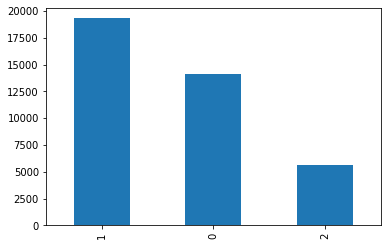

In [ ]:
final_data['difficulty_label'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
val = pd.read_csv("val_skill_name_difficulty.csv")

In [ ]:
val

,board_syllabus,question_answer,skill_label,difficulty_label
0,AP>>VII>>Science>>Animal Fibre>>Silk,Name the two types of protein from which silk...,3,0
1,Maharashtra New>>VIII>>General Science>>Man Ma...,Give reasons: (i) Thermocol is used for the p...,4,2
2,CBSE>>VI>>Science>>Fun with Magnets>>Demagneti...,Identify the odd option. Rubbing a magnetic m...,4,2
3,Tamil Nadu>>VIII>>Science>>Term 1>>Physics>>Li...,Find the speed of light in glass of refractiv...,1,0
4,Raj English>>XII>>Biology>>Integumentary Syste...,Which of the following function is associated...,2,0
...,...,...,...,...
2055,CBSE>>XI>>Chemistry>>Chemistry : Part I>>Equil...,The solubility of A 2 X 3 is y mol.dm -3 . So...,1,0
2056,CBSE>>VI>>Computer Science>>Using Mail Merge>>...,"To create an invitation letter, click on Mail...",1,1
2057,CBSE>>XII>>Physics>>Physics : Part - II>>Ray O...,Choose the correct option about the intensity...,0,0
2058,ICSE OLD>>VII>>Biology>>Organ System of Human ...,Which of the following instrument is used to ...,4,1


In [ ]:
test = pd.read_csv("test_skill_name_difficulty.csv")
test

,board_syllabus,question_answer,skill_label,difficulty_label
0,CBSE>>Nursery>>Environmental Science>>Common V...,Write down the names of some common vegetable...,3,2
1,CBSE>>XII>>Physics>>Physics : Part - II>>Atoms,Name the series of hydrogen atom which lies i...,1,1
2,"ICSE OLD>>XI>>Political Science>>State, Govern...",Which of the following is not the element of ...,0,0
3,Maharashtra New>>VII>>General Science>>Static ...,The process of electrically charging an objec...,3,1
4,Tamil Nadu>>IX>>Science>>Physics>>Measurement>...,The mass of an object is measured in kilogram...,3,1
...,...,...,...,...
4572,ICSE OLD>>VIII>>Biology>>Nervous System And Se...,Which of the following is the first cranial n...,3,1
4573,CBSE>>VII>>Computer Science>>Advance features ...,To ungroup the worksheets: Right-click on any...,2,0
4574,CBSE>>VIII>>Science>>Chemical Effects of Elect...,After passing electricity through a solution ...,0,2
4575,CLSP>>Stage 9>>Science>>Chemistry>>Material pr...,Identify the scientists who gave the “plum-pu...,3,0


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:

def get_labels(prediction):
    predicted_label =  LE.inverse_transform([prediction])
    return predicted_label[0]

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE = joblib.load('label_encoder_difficulty_Lstm')

get_labels(0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


'Difficult'

In [ ]:
final_data

,board_syllabus,question_answer,skill_label,difficulty_label
0,"Raj English>>XII>>Biology>>Domestication, Cult...","Among the following, freshwater fish is rohu ...",3,0
1,Maharashtra New>>VI>>General Science>>Sound>>P...,Which of the following statement is true? Sou...,3,2
2,ICSE OLD>>XI>>Computer Science>>Functions>>Con...,The process of using multiple constructors wi...,3,0
3,CBSE>>VI>>Science>>Separation of Substances>>S...,Sieving is based on the difference in the siz...,3,1
4,AP>>X>>Biology>>Excretion - The Wastage Dispos...,The removal of toxic and unwanted waste subst...,3,1
...,...,...,...,...
39124,CAPS(South Africa)>>Grade 7>>Natural Sciences>...,How heat loss problems are prevented by birds...,2,1
39125,CBSE>>X>>Science>>Metals and Non-Metal,Give reasons why copper is used to make hot w...,3,2
39126,CBSE>>VII>>Science>>Motion and Time,The horizontal line in the graph is denoted as...,2,1
39127,Tamil Nadu>>VI>>Science>>Term 1>>Physics>>Forc...,SI unit of force is newton The SI unit of for...,3,2


In [ ]:
new_data = final_data

In [ ]:
question_answer = new_data["question_answer"].values
categories = new_data["difficulty_label"].values

In [ ]:
question_answer

array([' Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.',
       ' Which of the following statement is true? Sound requires a medium for propagation. Sound travels through a medium (solid, liquid or gas). It cannot travel through vacuum.',
       ' The process of using multiple constructors with the same name but with different parameters is known as: Constructor overloading Constructor overloading is a technique in Java in which a class can have any number of constructors that differ in parameter lists.',
       ...,
       'The horizontal line in the graph is denoted as the X-axis. The horizontal line points in the horizontal direction and is denoted as the X-axis in the graph.',
       ' SI unit of force is newton The SI unit of force is Newton (N), named after famous scientist Isaac Newton who discovered force of gravitation.',
       ' In machines sliding frictions is replaced to rolling by use of ball 

In [ ]:
question_answer[0]

' Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.'

In [ ]:
len(categories)

39129

In [ ]:
import torch
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:   Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.
Token IDs: tensor([  101,  2426,  1996,  2206,  1010, 12573,  3869,  2003, 20996,  6979,
        20996,  6979,  2003,  1037,  4840,  2300,  3869,  1012,  2060,  2691,
        12573,  3869,  2024,  4937,  2721,  1010,  2691, 29267,  1012,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
print('Original: ', len(question_answer[1]))
print('Token IDs:', len(input_ids[1]))

Original:  171
Token IDs: 128


In [ ]:
val_text = val["question_answer"].values
val_labels = val["difficulty_label"].values
test_text = test["question_answer"].values
test_labels = test["difficulty_label"].values

In [ ]:
test_labels

array([2, 1, 0, ..., 2, 0, 1])

In [ ]:
val_labels

array([0, 2, 2, ..., 0, 1, 0])

In [ ]:
val_input_ids = []
val_attention_masks = []

for sent in val_text:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    val_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    val_attention_masks.append(encoded_dict['attention_mask'])
# Convert the lists into tensors.
val_input_ids = torch.cat(val_input_ids, dim=0)
val_attention_masks = torch.cat(val_attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', val_text[0])
print('Token IDs:', val_attention_masks[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:   Name the two types of protein from which silk is made. Sericin and fibroin 
Token IDs: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
print('Original: ', val_text[1])
print('Token IDs:', val_input_ids[1])

Original:   Give reasons: (i) Thermocol is used for the packing of delicate items. (ii) Name two diseases that may develop in people working in thermocol industries. (i) Thermocol is a good shock-absorber, therefore, it is used for packing of delicate items. (ii) People working in thermocol industries may suffer from blood cancer such as leukemia and lymphoma or have problems in eyes and respiratory system. 
Token IDs: tensor([  101,  2507,  4436,  1024,  1006,  1045,  1007,  1996, 10867, 24163,
         2140,  2003,  2109,  2005,  1996, 14743,  1997, 10059,  5167,  1012,
         1006,  2462,  1007,  2171,  2048,  7870,  2008,  2089,  4503,  1999,
         2111,  2551,  1999,  1996, 10867, 24163,  2140,  6088,  1012,  1006,
         1045,  1007,  1996, 10867, 24163,  2140,  2003,  1037,  2204,  5213,
         1011, 16888,  2121,  1010,  3568,  1010,  2009,  2003,  2109,  2005,
        14743,  1997, 10059,  5167,  1012,  1006,  2462,  1007,  2111,  2551,
         1999,  1996, 10867, 24

In [ ]:
labels = torch.tensor(categories)
val_labels = torch.tensor(val_labels)

In [ ]:
val_labels

tensor([0, 2, 2,  ..., 0, 1, 0])

In [ ]:
get_labels(1)

'Easy'

In [ ]:
len(set(final_data["question_answer"].values).intersection(val["question_answer"].values))

0

In [ ]:
num_classes = len(list(set(categories)))
list(set(categories))

[0, 1, 2]

In [ ]:
from torch.utils.data import TensorDataset, random_split
# train_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# difficulty_tensor = torch.tensor(difficulty_level_vectors,dtype=torch.float)
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)
val_dataset = TensorDataset(val_input_ids, val_attention_masks,val_labels) 
# Create a 90-10train-validation split.

# Calculate the number of samples to include in each set.
# train_size = int(0.90 * len(dataset))
# val_size = len(dataset) - train_size

# # Divide the dataset by randomly selecting samples.
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# print('{:>5,} training samples'.format(train_size))
# # print('{:>5,} validation samples'.format(val_size))

In [ ]:

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 34
train_dataloader = DataLoader(
            dataset,  # The training samples.
            sampler = RandomSampler(dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
from transformers import BertModel, AdamW, BertConfig

# # Loads BertForSequenceClassification, the pretrained BERT model with a single 
# model = BertModel.from_pretrained(
#     "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
# )

# # Tell pytorch to run this model on the GPU.
# model.cuda()

In [ ]:




set(test["question_answer"].values).intersection(set(final_data["question_answer"].values))

set()

In [ ]:
!unzip "/content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_interactive_final.zip"

Archive:  /content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_interactive_final.zip
   creating: model_bert_multi_task_interactive_final/
  inflating: model_bert_multi_task_interactive_final/special_tokens_map.json  
 extracting: model_bert_multi_task_interactive_final/tokenizer_config.json  
  inflating: model_bert_multi_task_interactive_final/vocab.txt  
  inflating: model_bert_multi_task_interactive_final/model_weights  


In [ ]:
# !unzip "/content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_prediction.zip"
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_prediction_final" /content

In [ ]:
from torch import nn


In [ ]:
from torch import nn
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count,skill_label_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=False,output_attentions=False)
        self.dropout = nn.Dropout(dropout)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        self.mlp2 = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),         
            nn.Linear(mlp_dim, skill_label_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        _,pooled_output = self.bert(tokens, attention_mask=masks)

        dropout_output = self.dropout(pooled_output)
        concat_output = dropout_output
        mlp_output = self.mlp(concat_output)
        skill_output = self.mlp2(concat_output)
        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output,skill_output

In [ ]:
num_classes

3

In [ ]:
model_multi_task = MultiClassClassifier('bert-base-uncased',3, 5,768,500,140,dropout=0.1,freeze_bert=False)
model_multi_task.load_state_dict(torch.load('model_bert_multi_task_prediction_final/model_weights'))
model_multi_task.cuda()

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
from torch import nn


class AttentionBlock(nn.Module):
  def __init__(self,vector_1_dim,vector_2_dim):
    super(AttentionBlock, self).__init__()
    self.Weights = nn.Parameter(torch.rand(vector_2_dim,vector_1_dim))
    self.bias = nn.Parameter(torch.zeros(1))

  def forward(self,vector_1,vector_2):
    #(batch_size,vector_2_dim,vector_1_dim)
    weights = self.Weights.repeat(vector_2.size(0),1,1)
    vector_1 = vector_1.unsqueeze(-1)  # (batch_size,vector_2_dim,vector_1_dim)
    weights = weights.matmul(vector_1) # results in (batch_size,vector_2_dim,1)
    weights = weights.repeat(vector_2.size(1),1,1,1).transpose(0,1)
    vector_2 = vector_2.unsqueeze(-2)
    attention_weights = torch.tanh(vector_2.matmul(weights).squeeze() + self.bias) # batch_size, vector_2_dim.size(0)
    if len(attention_weights.shape) ==1:
      attention_weights = attention_weights.squeeze()
      attention_weights = attention_weights.reshape(1,-1)
    attention_weights = attention_weights.squeeze()
    # print("torch.exp(attention_weights)",torch.exp(attention_weights).shape,attention_weights.shape,torch.exp(attention_weights).sum(dim=1).shape)
    attention_weights = torch.exp(attention_weights)/ torch.exp(attention_weights).sum(dim=1,keepdim=True)

    return attention_weights

# bloom interactive attention
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count,skill_label_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=True,output_attentions=True)
        self.dropout = nn.Dropout(dropout)
        self.bloom_attention = AttentionBlock(768, 768)

        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        self.mlp2 = nn.Sequential(  
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),         
            nn.Linear(mlp_dim, skill_label_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        _, pooled_output,hidden_states,attentions = self.bert(tokens, attention_mask=masks)
        dropout_output = self.dropout(pooled_output)
        concat_output = dropout_output

        # mlp_output = self.mlp(concat_output)
        skill_output_probas = self.mlp2(concat_output)
        skill_output = torch.argmax(skill_output_probas,axis=1).cpu().numpy()
        skill_output = LE_skill.inverse_transform(skill_output)
        skill_input_ids = []
        skill_attention_masks = []
        for skill_text in skill_output:
          encoded_skill_output = tokenizer.encode_plus(
                          skill_text,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = 128,           # Pad & truncate all sentences.
                          pad_to_max_length = True,
                          truncation=True,
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
          skill_input_ids.append(encoded_skill_output['input_ids'])
          skill_attention_masks.append(encoded_skill_output['attention_mask'])
        skill_input_ids = torch.cat(skill_input_ids,dim=0).cuda()
        skill_attention_masks = torch.cat(skill_attention_masks,dim=0).cuda()
        _,_,hidden_states_skill,_ = self.bert(skill_input_ids,skill_attention_masks)

        skill_hidden_averaged =  torch.sum(hidden_states_skill[12],dim=1)/hidden_states_skill[12].shape[1]

        bloom_attention_weights = self.bloom_attention(skill_hidden_averaged, hidden_states[12])

        bloom_attention_weights = bloom_attention_weights.unsqueeze(-2)
        # print("context_attention_weights",context_attention_weights.shape,context_out.shape)
        input_attended_vector = bloom_attention_weights.matmul(hidden_states[12]).squeeze()

        mlp_output = self.mlp(input_attended_vector)

        # print("bloom attention weights", bloom_attention_weights.shape)
        # print("_hidden_states",hidden_states_skill[12].shape, hidden_states[12].shape,skill_hidden_averaged.shape)

        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output,skill_output_probas

In [ ]:
skill_label_count = len(list(set(new_data["skill_label"].values)))
skill_label_count

5

In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_interactive_final" /content/

In [ ]:
model_interactive = MultiClassClassifier('bert-base-uncased',num_classes, skill_label_count,768,500,140,dropout=0.1,freeze_bert=False)
model_interactive.load_state_dict(torch.load("model_bert_multi_task_interactive_final/model_weights"))
model_interactive.cuda()

MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
# for param in model.bert.encoder.layer[0:12].parameters():
#     param.requires_grad=False
# for param in model.bert.embeddings.parameters():
#     param.requires_grad=False


In [ ]:
test_features = test["question_answer"].values
test_labels = test["difficulty_label"].values
test_skill_labels = test["skill_label"].values

In [ ]:




test_labels

array([2, 1, 0, ..., 2, 0, 1])

In [ ]:
test_features

array([' Write down the names of some common vegetables. Answer may vary Probable answer – Names of some common vegetables are potato, onion, tomato and carrot. ',
       ' Name the series of hydrogen atom which lies in the U.V region. Lyman series lies in the U.V region. ',
       ' Which of the following is not the element of an association? Relationships are abstract Each association has elements 1) a group of people, 2) voluntary Membership, 3) shared and common interests or needs as the basis, 4) some set of objective goals which are to be achieved collectively by all the members, 5) a voluntary organisation, and 6) co-operation among the members objectives pooled resources for funds needed for action.',
       ...,
       ' After passing electricity through a solution the change that takes place is a chemical change Physical changes are those changes that do not result in the production of a new substance whereas a chemical change involves the production of a new substance. For e

In [ ]:
test_features[0]

' Write down the names of some common vegetables. Answer may vary Probable answer – Names of some common vegetables are potato, onion, tomato and carrot. '

In [ ]:
input_ids = []
attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
test_labels = torch.tensor(test_labels)
test_skill_labels = torch.tensor(test_skill_labels)

# Set the batch size.  
batch_size = 34

# test_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# print(test_poincare_tensor.shape)
# difficulty_tensor = torch.tensor(difficulty_level_vectors,dtype=torch.float)
# print("difficulty_tensor",difficulty_tensor.shape)
# Combine the training inputs into a TensorDataset.
prediction_data = TensorDataset(input_ids, attention_masks, test_labels,test_skill_labels)
# Create the DataLoader.
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
from sklearn.metrics import precision_recall_fscore_support


In [ ]:
def get_confusion_matrix(predicted,actual):
    conf_matrix = np.zeros((3, 3))
    for pred,act in zip(predicted,actual):
        conf_matrix[act,pred]+=1
    return conf_matrix
        
def get_TP(confusion_matrix,label):
    tp = confusion_matrix[label][label]
    return tp

def get_FN(confusion_matrix,label):
    row = confusion_matrix[label,]
    row_truepositives = row[label]
    fn = row.sum() - row_truepositives
    return fn

def get_FP(confusion_matrix,tag):
    col = confusion_matrix[:,tag]
    col_tp = col[tag]
    #  sum of all values in column except tp
    fp = col.sum() - col_tp
    return fp
def Precision(conf_matrix):
    precision = 0.0
    for label in [0,1,2]:
        dividor= get_TP(conf_matrix,label)+get_FP(conf_matrix,label)
        if dividor != 0.0:
            precision += (get_TP(conf_matrix,label))/dividor
    return (precision / 3)

def Recall(conf_matrix):
    recall = 0.0
    for label in [0,1,2]:
        dividor=get_TP(conf_matrix,label)+get_FN(conf_matrix,label)
        if dividor != 0.0:
            recall += (get_TP(conf_matrix,label))/dividor
    return (recall / 3)

def F1(precision,recall):
    return (2*precision*recall)/(precision+recall)
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
def print_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision(conf_matrix)
    recall = Recall(conf_matrix)
    f1_score = F1(precision,recall)
    return (precision,recall,f1_score)

In [ ]:

def Precision_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_precision = dict()
    for label in [0,1,2]:
        true_sample = [sample for sample in test_samples if sample==label ]
        if (get_TP(conf_matrix,label)+get_FP(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) *(get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label)))
            label_wise_precision[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label))

    
    precision =  accum/len(test_samples)
            
    return precision


def Recall_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_recall = dict()
    for label in [0,1,2]:
        true_sample = [sample for sample in test_samples if sample==label ]

        if (get_TP(conf_matrix,label)+get_FN(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) * (get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label)))
            label_wise_recall[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label))

    
    recall =  accum/len(test_samples)
    return recall
def print_weighted_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision_macro_weighted(conf_matrix,test_labels)
    recall = Recall_macro_weighted(conf_matrix,test_labels)
    f1_score = F1(precision,recall)
    return (precision,recall,f1_score)

In [ ]:
def make_lstm_and_gru_predictions(index, params):
  model_lstm.eval()
  model_gru.eval()
  for i,batch in enumerate(test_iter):
    outputs = []
    if i == index:
      # print("i",i,index)
      with torch.no_grad():
          question, x_len = batch.text
          x = question.cuda()
          # outs = sigmoid(outs.cpu().data.numpy()).tolist()
          y = batch.label.type(torch.long).cuda()
          if params['lstm']>=0.5:
            lstm_outputs = model_lstm(x,x_len)
            outputs.append(lstm_outputs)
          if params["gru"]>=0.5:
            gru_outputs = model_gru(x,x_len)
            outputs.append(gru_outputs)
          
          return outputs



Now for comapring statistical significance between ensemble mlp and bo ensemble


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
kf.split(test_features)

<generator object _BaseKFold.split at 0x7fe5e619ae50>

In [ ]:
def get_interactive_predictions(prediction_dataloader):
  predictions=[]
  true_labels=[]
  for index,batch in enumerate(prediction_dataloader):
      final_outputs = []
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels, id = batch
      # Telling the model not to compute or store gradients, saving memory and 
      # speeding up prediction
      with torch.no_grad():
          # Forward pass, calculate logit predictions
            # print("multi")
          interactive_output,_ = model_interactive(b_input_ids,b_input_mask)
          # final_outputs.append(interactive_output)
      # logits_2 = outputs
      # logist_1 = output_bert[0]
      logits = interactive_output
      # logits = torch.mean(torch.stack(predictions_1), dim=0)
      # else:
        # logits = predictions_1[0]
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()

      
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
  flat_predictions = np.concatenate(predictions, axis=0)

  flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

    # Combine the correct labels for each batch into a single list.
  flat_true_labels = np.concatenate(true_labels, axis=0)
  # metrics = precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')
  metrics = print_weighted_metrics(flat_predictions,flat_true_labels)
  macro_metrics = print_metrics(flat_predictions,flat_true_labels)
  return metrics[2],macro_metrics[2]

In [ ]:
def get_multi_task_predictions(prediction_dataloader):
  predictions=[]
  true_labels=[]
  for index,batch in enumerate(prediction_dataloader):
      final_outputs = []
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels, id = batch
      # Telling the model not to compute or store gradients, saving memory and 
      # speeding up prediction
      with torch.no_grad():
          # Forward pass, calculate logit predictions
            # print("multi")
          interactive_output,_ = model_multi_task(b_input_ids,b_input_mask)
          # final_outputs.append(interactive_output)
      # logits_2 = outputs
      # logist_1 = output_bert[0]
      logits = interactive_output
      # logits = torch.mean(torch.stack(predictions_1), dim=0)
      # else:
        # logits = predictions_1[0]
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()

      
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
  flat_predictions = np.concatenate(predictions, axis=0)

  flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

    # Combine the correct labels for each batch into a single list.
  flat_true_labels = np.concatenate(true_labels, axis=0)
  # metrics = precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')
  metrics = print_weighted_metrics(flat_predictions,flat_true_labels)
  macro_metrics = print_metrics(flat_predictions,flat_true_labels)
  return metrics[2],macro_metrics[2]

In [ ]:
test_labels = test["difficulty_label"].values
test_skill_labels = test["skill_label"].values

In [ ]:
test.iloc[[2,3],:]

,board_syllabus,question_answer,skill_label,difficulty_label
2,"ICSE OLD>>XI>>Political Science>>State, Govern...",Which of the following is not the element of ...,0,0
3,Maharashtra New>>VII>>General Science>>Static ...,The process of electrically charging an objec...,3,1


In [ ]:
for indices in kf.split(test_features):
  print(len(indices[0]),len(indices[1]))

3661 916
3661 916
3662 915
3662 915
3662 915


In [ ]:
import torch.nn.functional as F
import numpy as np
f1_multi_ensemble = []
f1_int_ensemble =[]
macro_f1_inti_ensemble = []
macro_f1_multi_ensemble = []
for indices in kf.split(test_features):
  input_ids = []
  attention_masks = []
  for sent in test_features[indices[0]]:


    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  test_labels_tensor = torch.tensor(test_labels[indices[0]])
  test_skill_labels_tensor = torch.tensor(test_skill_labels[indices[0]])

  # test_text = torchtext.data.TabularDataset(examples=test.iloc[indices[1],:],
  #                                    fields={'difficulty_label': ('label', target_diff),
  #                                            'question_answer': ('text',text)})
  # test_iter = torchtext.data.Iterator(dataset=test_text, batch_size=34,train=False, sort=False, sort_within_batch=False,shuffle=False)
# Set the batch size.  /
  # batch_size = 34  

  prediction_data = TensorDataset(input_ids, attention_masks, test_labels_tensor,test_skill_labels_tensor)
  # Create the DataLoader.
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=32)
  f1_bo,macro_f1_bo = get_interactive_predictions(prediction_dataloader)
  f1_mlp,macro_f1_mlp = get_multi_task_predictions(prediction_dataloader)
  f1_multi_ensemble.append(f1_mlp)
  f1_int_ensemble.append(f1_bo)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
print(f1_int_ensemble)

[0.559500493839273, 0.5591086890204817, 0.5592984641019563, 0.5589826122226967, 0.5579003427739674]


In [ ]:
f1_multi_ensemble

[0.5415706960922761,
 0.5464752720257292,
 0.5455213042423982,
 0.5466337606364109,
 0.5423183782002412]

In [ ]:
from scipy import stats
stats.ttest_rel(f1_int_ensemble,f1_multi_ensemble)

Ttest_relResult(statistic=13.922217071286386, pvalue=0.00015435686488192736)

In [ ]:
print(f1_int_ensemble)

[0.559500493839273, 0.5591086890204817, 0.5592984641019563, 0.5589826122226967, 0.5579003427739674]


In [ ]:
f1_multi_ensemble

[0.5415706960922761,
 0.5464752720257292,
 0.5455213042423982,
 0.5466337606364109,
 0.5423183782002412]

In [ ]:
from scipy import stats
stats.ttest_rel(f1_int_ensemble,f1_multi_ensemble)

Ttest_relResult(statistic=13.922217071286386, pvalue=0.00015435686488192736)

In [ ]:
input_ids = []
attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
test_labels = torch.tensor(test_labels)
test_skill_labels = torch.tensor(test_skill_labels)

# Set the batch size.  
batch_size = 34
# test_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# print(test_poincare_tensor.shape)
# difficulty_tensor = torch.tensor(difficulty_level_vectors,dtype=torch.float)
# print("difficulty_tensor",difficulty_tensor.shape)
# Combine the training inputs into a TensorDataset.
prediction_data = TensorDataset(input_ids, attention_masks, test_labels,test_skill_labels)
# Create the DataLoader.
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Prediction on test set
# device = ''
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model_interactive.eval()

# Tracking variables 
predictions,skill_predictions , true_labels, true_skill_labels = [], [], [], []

# Predict ea
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels,skill_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  # print("b_input_ids",b_input_ids.shape)
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs,skill_ouputs = model_interactive(b_input_ids,b_input_mask)

  logits = outputs
  skill_logits = skill_ouputs

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  skill_logits = skill_logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  skill_labels = skill_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  skill_predictions.append(skill_logits)
  true_labels.append(label_ids)
  true_skill_labels.append(skill_labels)


print('    DONE.')

Predicting labels for 4,577 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


    DONE.


In [ ]:
flat_predictions = np.concatenate(predictions, axis=0)

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
# mcc = matthews_corrcoef(flat_true_skill_labels, flat_skill_predictions)
# 
# print('Total MCC: %.3f' % mcc)

In [ ]:
#difficuty macro
print_metrics(flat_predictions,flat_true_labels)

(0.5442240407604801, 0.44662925306253287, 0.4906203134990908)

In [ ]:
#difficulty
print_weighted_metrics(flat_predictions,flat_true_labels)

(0.5562658106941797, 0.5641249726895347, 0.5601678270116647)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model_interactive.eval()

# Tracking variables 
predictions,skill_predictions , true_labels, true_skill_labels = [], [], [], []

# Predict ea
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels,skill_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  # print("b_input_ids",b_input_ids.shape)
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs,skill_ouputs = model_multi_task(b_input_ids,b_input_mask)

  logits = outputs
  skill_logits = skill_ouputs

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  skill_logits = skill_logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  skill_labels = skill_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  skill_predictions.append(skill_logits)
  true_labels.append(label_ids)
  true_skill_labels.append(skill_labels)


print('    DONE.')

Predicting labels for 4,577 test sentences...
    DONE.


In [ ]:
flat_predictions = np.concatenate(predictions, axis=0)

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
# mcc = matthews_corrcoef(flat_true_skill_labels, flat_skill_predictions)
# 
# print('Total MCC: %.3f' % mcc)

In [ ]:
#difficuty macro
print_metrics(flat_predictions,flat_true_labels)

(0.5161535345613788, 0.44006273510323307, 0.47508067653345765)

In [ ]:
#difficulty
print_weighted_metrics(flat_predictions,flat_true_labels)

(0.5384631358864914, 0.5558225912169543, 0.5470051706796026)

In [ ]:
print(len(test_features))

4577


In [ ]:
f1_bo,f1_mlp

(0.5579003427739674, 0.5423183782002412)

Now for macro f1

In [ ]:
import torch.nn.functional as F
import numpy as np
f1_multi_ensemble = []
f1_int_ensemble =[]
macro_f1_inti_ensemble = []
macro_f1_multi_ensemble = []
for indices in kf.split(test_features):
  input_ids = []
  attention_masks = []
  for sent in test_features[indices[0]]:


    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  test_labels_tensor = torch.tensor(test_labels[indices[0]])
  test_skill_labels_tensor = torch.tensor(test_skill_labels[indices[0]])

  # test_text = torchtext.data.TabularDataset(examples=test.iloc[indices[1],:],
  #                                    fields={'difficulty_label': ('label', target_diff),
  #                                            'question_answer': ('text',text)})
  # test_iter = torchtext.data.Iterator(dataset=test_text, batch_size=34,train=False, sort=False, sort_within_batch=False,shuffle=False)
# Set the batch size.  /
  # batch_size = 34  

  prediction_data = TensorDataset(input_ids, attention_masks, test_labels_tensor,test_skill_labels_tensor)
  # Create the DataLoader.
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=32)
  f1_bo,macro_f1_bo = get_interactive_predictions(prediction_dataloader)
  f1_mlp,macro_f1_mlp = get_multi_task_predictions(prediction_dataloader)
  macro_f1_multi_ensemble.append(macro_f1_mlp)
  macro_f1_inti_ensemble.append(macro_f1_bo)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad

In [ ]:
print(macro_f1_multi_ensemble)

[0.4723323632017536, 0.47162524715025955, 0.47696706290500435, 0.4776026417020845, 0.48070496540321717]


In [ ]:
macro_f1_inti_ensemble

[0.4863973074087436,
 0.4897739210478396,
 0.491281270282824,
 0.4872976829800696,
 0.483150866886412]

In [ ]:
from scipy import stats
stats.ttest_rel(macro_f1_inti_ensemble,macro_f1_multi_ensemble)

Ttest_relResult(statistic=4.378008172058992, pvalue=0.011893396209914083)

In [ ]:
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {get_labels(label)}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
accuracy_per_class(flat_predictions,flat_true_labels)

Class: Difficult
Accuracy: 730/1646

Class: Easy
Accuracy: 1755/2207

Class: Medium
Accuracy: 59/724



# Majority Voting

In [ ]:
    print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

    # Put model in evaluation mode
    model.eval()
    model_multi_task.eval()
    model_cascade.eval()
    model_interactive.eval()

    # Tracking variables 
    predictions , true_labels,ids = [], [], []

# 8 models in total
    # Predict 
    for index,batch in enumerate(prediction_dataloader):
      final_outputs = []
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels, skill_labels = batch
      # Telling the model not to compute or store gradients, saving memory and 
      # speeding up prediction
      with torch.no_grad():
          # Forward pass, calculate logit predictions
            # print("multi")

          # multi task model
          outputs,_ = model_multi_task(b_input_ids,b_input_mask)
            # print("outputs",outputs.shape,b_input_ids.shape,batch[0].shape,index)
          final_outputs.append(outputs)
            # print("cascade")

          # assuming skill is given interactive attention
          output_skill_given = model_skill_given(b_input_ids,b_input_mask,skill_labels)
          final_outputs.append(output_skill_given)

          #bert cascade
          output_cascade = model_cascade(b_input_ids,b_input_mask)
          final_outputs.append(output_cascade)

          # interactive bert with pretrained model for skilled prediction
          outputs,_ = model_interactive_pre_trained(b_input_ids,b_input_mask)
          final_outputs.append(outputs)

            # print("normal")
          # output_difficulty = model(b_input_ids,b_input_mask)
          # final_outputs.append(output_difficulty)

          # interactive attention model (ours)
          interactive_output,_ = model_interactive(b_input_ids,b_input_mask)
          final_outputs.append(interactive_output)
          params =dict()
          params['lstm'] =1
          params['gru'] = 1

          # lstm plus GRU
          out = make_lstm_and_gru_predictions(index,params)
          final_outputs.append(out[0])
          final_outputs.append(out[1])

          # base difficulty bert model
          output_difficulty = model(b_input_ids,b_input_mask)
          final_outputs.append(output_difficulty)
      # logits_2 = outputs
      # logist_1 = output_bert[0]
      predictions_1 = final_outputs
      logits,_ = torch.max(torch.stack(predictions_1), dim=0)
      # else:
        # logits = predictions_1[0]
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()

      
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
    flat_predictions = np.concatenate(predictions, axis=0)

    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

    # Combine the correct labels for each batch into a single list.
    flat_true_labels = np.concatenate(true_labels, axis=0)
    # metrics = precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')
    metrics = print_weighted_metrics(flat_predictions,flat_true_labels)
    macro_metrics = print_metrics(flat_predictions,flat_true_labels)
    print("macro_metrics",macro_metrics)

    print("weighted",metrics)
    print('    DONE.')

Predicting labels for 4,577 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



macro_metrics (0.5252243597242369, 0.4660716619455976, 0.49388312851016175)
weighted (0.5499026145685715, 0.560847716845095, 0.5553212403284401)
    DONE.


# Mean voting

In [ ]:
    print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

    # Put model in evaluation mode
    model.eval()
    model_multi_task.eval()
    model_cascade.eval()
    model_interactive.eval()

    # Tracking variables 
    predictions , true_labels,ids = [], [], []


    # Predict 
    for index,batch in enumerate(prediction_dataloader):
      final_outputs = []
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels, skill_labels = batch
      # Telling the model not to compute or store gradients, saving memory and 
      # speeding up prediction
      with torch.no_grad():
          # Forward pass, calculate logit predictions
            # print("multi")
          outputs,_ = model_multi_task(b_input_ids,b_input_mask)
            # print("outputs",outputs.shape,b_input_ids.shape,batch[0].shape,index)
          final_outputs.append(outputs)
            # print("cascade")
          output_skill_given = model_skill_given(b_input_ids,b_input_mask,skill_labels)
          final_outputs.append(output_skill_given)
          output_cascade = model_cascade(b_input_ids,b_input_mask)
          final_outputs.append(output_cascade)
          outputs,_ = model_interactive_pre_trained(b_input_ids,b_input_mask)
          final_outputs.append(outputs)

            # print("normal")
          # output_difficulty = model(b_input_ids,b_input_mask)
          # final_outputs.append(output_difficulty)
          interactive_output,_ = model_interactive(b_input_ids,b_input_mask)
          final_outputs.append(interactive_output)
          params =dict()
          params['lstm'] =1
          params['gru'] = 1
          out = make_lstm_and_gru_predictions(index,params)
          final_outputs.append(out[0])
          final_outputs.append(out[1])
          output_difficulty = model(b_input_ids,b_input_mask)
          final_outputs.append(output_difficulty)
      # logits_2 = outputs
      # logist_1 = output_bert[0]
      predictions_1 = final_outputs
      logits = torch.mean(torch.stack(predictions_1), dim=0)
      # else:
        # logits = predictions_1[0]
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()

      
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
    flat_predictions = np.concatenate(predictions, axis=0)

    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

    # Combine the correct labels for each batch into a single list.
    flat_true_labels = np.concatenate(true_labels, axis=0)
    # metrics = precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')
    metrics = print_weighted_metrics(flat_predictions,flat_true_labels)
    macro_metrics = print_metrics(flat_predictions,flat_true_labels)
    print("macro_metrics",macro_metrics)

    print("weighted",metrics)
    print('    DONE.')

Predicting labels for 4,577 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



macro_metrics (0.5471735665240417, 0.4572675311906578, 0.49819687081004643)
weighted (0.5652408564340834, 0.5724273541621149, 0.5688114072262386)
    DONE.
